**Chapter 3 Time series decomposition**

When we decompose a time series into components, we usually combine the trend and cycle into a single **trend-cycle** component (often just called the **trend** for simplicity). Thus we can think of a time series as comprising three components: a trend-cycle component, a seasonal component, and a remainder component (containing anything else in the time series). For some time series (e.g., those that are observed at least daily), there can be more than one seasonal component, corresponding to the different seasonal periods.

**3.1 Transformations and adjustments**


Adjusting the historical data can often lead to a simpler time series. Here, we deal with four kinds of adjustments: **calendar adjustments**, **population adjustments**, **inflation adjustments** and **mathematical transformations**. The purpose of these adjustments and transformations is to simplify the patterns in the historical data by removing known sources of variation, or by making the pattern more consistent across the whole data set. Simpler patterns are usually easier to model and lead to more accurate forecasts.

**Calendar adjustments** 

Some of the variation seen in seasonal data may be due to simple calendar effects. In such cases, it is usually much easier to remove the variation before doing any further analysis.

For example, if you are studying the total monthly sales in a retail store, there will be variation between the months simply because of the different numbers of trading days in each month, in addition to the seasonal variation across the year. It is easy to remove this variation by computing average sales per trading day in each month, rather than total sales in the month. Then we effectively remove the calendar variation.

**Population adjustments**  

Any data that are affected by population changes can be adjusted to give per-capita data. That is, consider the data per person (or per thousand people, or per million people) rather than the total. For example, if you are studying the number of hospital beds in a particular region over time, the results are much easier to interpret if you remove the effects of population changes by considering the number of beds per thousand people. Then you can see whether there have been real increases in the number of beds, or whether the increases are due entirely to population increases. It is possible for the total number of beds to increase, but the number of beds per thousand people to decrease. This occurs when the population is increasing faster than the number of hospital beds. For most data that are affected by population changes, it is best to use per-capita data rather than the totals.


**Inflation adjustments**  

Data which are affected by the value of money are best adjusted before modelling. For example, the average cost of a new house will have increased over the last few decades due to inflation. A $200,000 house this year is not the same as a $200,000 house twenty years ago. For this reason, financial time series are usually adjusted so that all values are stated in dollar values from a particular year. For example, the house price data may be stated in year 2000 dollars.

To make these adjustments, a price index is used. If $z_t$ denotes the price index and $y_t$ denotes the original house price in year $t$ then $x_t = y_t/z_t*2000$ gives the adjusted house price at year 2000 dollar values. Price indexes are often constructed by government agencies. For consumer goods, a common price index is the Consumer Price Index (or CPI).

This allows us to compare the growth or decline of industries relative to a common price value. For example, looking at aggregate annual “newspaper and book” retail turnover from aus_retail, and adjusting the data for inflation using CPI from global_economy allows us to understand the changes over time.

**Mathematical transformations**

If the data shows variation that increases or decreases with the level of the series, then a transformation can be useful. For example, a logarithmic transformation is often useful. If we denote the original observations as $y_1, ..., y_T$ and the transformed observations as $w_1, ..., w_T$ then $w_T = log(y_T)$. Logarithms are useful because they are interpretable: changes in a log value are relative (or percentage) changes on the original scale. So if log base 10 is used, then an increase of 1 on the log scale corresponds to a multiplication of 10 on the original scale. If any value of the original series is zero or negative, then logarithms are not possible.

**3.2 Time series components**  

If we assume an additive decomposition, then we can write 
$$y_t = S_t + T_t + R_t$$
where $y_t$ is the data, $S_t$ is the seasonal component, $T_t$ is the trend-cycle component, and $R_t$ is the remainder component, all at period $t$. Alternatively, a multiplicative decomposition would be written as
$$y_t = S_t \times T_t \times R_t$$
The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series.

An alternative to using a multiplicative decomposition is to first transform the data until the variation in the series appears to be stable over time, then use an additive decomposition. When a log transformation has been used, this is equivalent to using a multiplicative decomposition on the original data because  

$y_t = S_t \times T_t \times R_t$ is equivalent to $y_t = log(S_t) + log(T_t) + log(R_t)$ 

**3.3 Moving averages**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_csv('../Data/yaoko00006/yaoko00006.csv')

df['Date'] = pd.to_datetime(df['time'], unit='ms')

df.set_index('Date', inplace=True)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.isocalendar().week  
df['DayOfWeek'] = df.index.dayofweek
df['Day'] = df.index.day
df['Hour'] = df.index.hour 
df['Minute'] = df.index.minute 


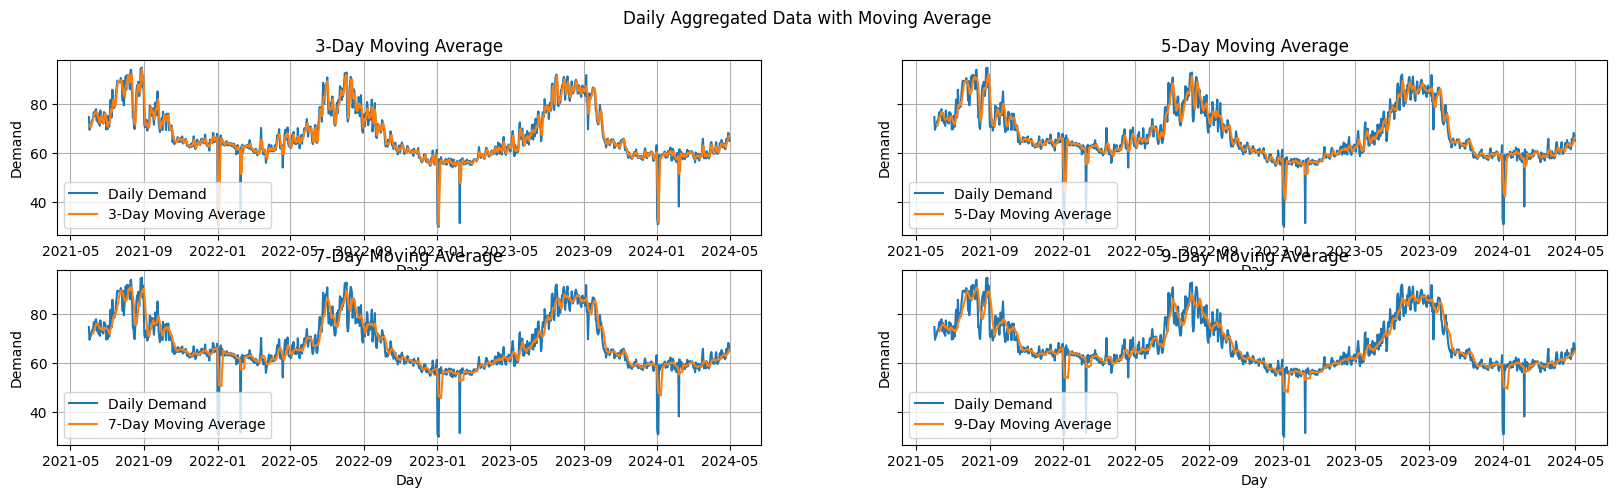

In [3]:
daily_data = df['demand'].resample('D').mean()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 5), sharey=True)  # Share y-axis across subplots
fig.suptitle('Daily Aggregated Data with Moving Average')
for i, window_size in enumerate([3, 5, 7, 9]) : 
    moving_average = daily_data.rolling(window=window_size).mean()
    row = i // 2
    col = i % 2
    axes[row, col].plot(daily_data.index, daily_data, label='Daily Demand')
    axes[row, col].plot(moving_average.index, moving_average, label=f'{window_size}-Day Moving Average')
    axes[row, col].set_title(f'{window_size}-Day Moving Average')
    axes[row, col].set_xlabel('Day')
    axes[row, col].set_ylabel('Demand')
    axes[row, col].legend()
    axes[row, col].grid(True)
if i == 0:
        axes[i].legend()
# Adjust the layout so the plots are not overlapping
plt.show()

**Moving averages of moving averages**  

When a 2-MA follows a moving average of an even order (such as 4), it is called a “centred moving average of order 4”

In general, a $2 \times m$-MA is equivalent to a weighted moving average of order $m + 1$ where all observations take the weight $1/m$, except for the first and last terms which take weights $1/(2m)$. o, if the seasonal period is even and of order $m$, we use a $2 \times m$-MA to estimate the trend-cycle. If the seasonal period is odd and of order $m$, we use a $m$-MA to estimate the trend-cycle. For example, a $2 \times 12$-MA can be used to estimate the trend-cycle of monthly data with annual seasonality and a $7$-MA can be used to estimate the trend-cycle of daily data with a weekly seasonality.

Other choices for the order of the MA will usually result in trend-cycle estimates being contaminated by the seasonality in the data.

**Weighted moving averages**  
Combinations of moving averages result in weighted moving averages. For example, the $ 2 \times 4$-MA discussed above is equivalent to a weighted $5$-MA with weights given by $[\frac{1}{8}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{8}]$ . In general, a weighted $m$-MA can be written as 
$$ \hat{T}_t = \sum_{j=-k}^{k}a_jy_{t+j},$$  
where $k = (m-1)/2$, and the weights are given by $[a_{-k}, ..., a_k]$. It is important that the weights all sum to one and that they are symmetric so that  a_j = a_{-j}. The simpe $m$-MA is a special case where of the weights are equal to $1/m$

A major advantage of weighted moving averages is that they yield a smoother estimate of the trend-cycle. Instead of observations entering and leaving the calculation at full weight, their weights slowly increase and then slowly decrease, resulting in a smoother curve.


**3.4 Classical decomposition**  
There are two forms of classical decomposition: **an additive decomposition** and a **multiplicative decomposition**. These are described below for a time series with seasonal period $m$ (e.g., $m=4$ for quarterly data, $m=12$ for monthly data, $m=7$ for daily data with a weekly pattern)  
In classical decomposition, we assume that the seasonal component is constant from year to year. For multiplicative seasonality, the  $m$ values that form the seasonal component are sometimes called the “seasonal indices”.

**Additive decomposition**  
**Step 1**  
If $m$ is and even number, compute the trend-cycle component $ \hat{T}_t $ using a $2 \times m$-MA. If $m$ an odd number, compute the trend-cycle component $ \hat{T}_t $ using and $m$-MA  
**Step 2**  
Calculate the detrended series: $y_t - \hat{T}_t $  
**Step 3**  
To estimate the seasonal component for each season, simply average the detrended values for that season. For example, with monthly data, the seasonal component for March is the average of all the detrended March values in the data. These seasonal component values are then adjusted to ensure that they add to zero. The seasonal component is obtained by stringing together these monthly values, and then replicating the sequence for each year of data. This gives  $\hat{S}_t$  
**Step 4**  
The remainder component is calculated by subtracting the estimated seasonal and trend-cycle components: $\hat{R}_t = y_t - \hat{T}_t - \hat{S}_t$

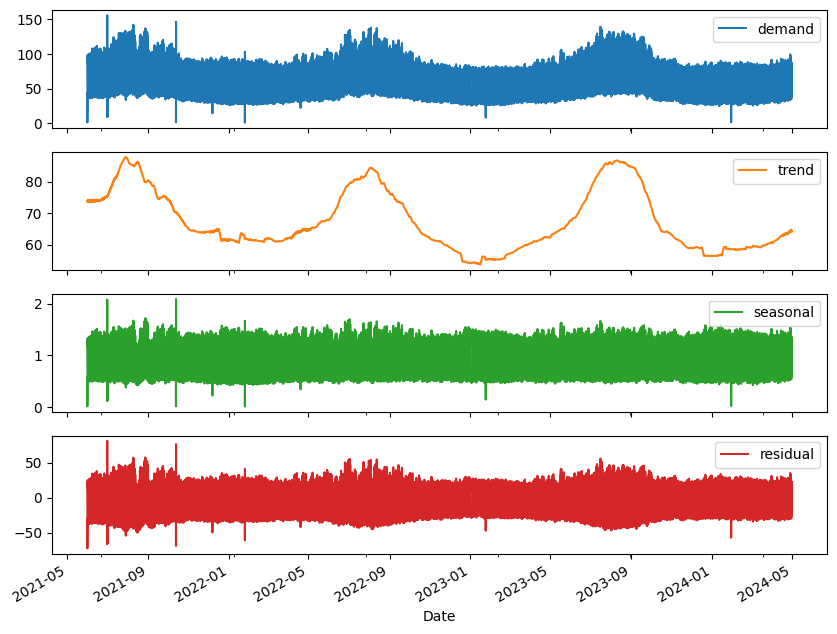

In [4]:
df['trend'] = df['demand'].rolling(window=48*30, center=True, min_periods=1).mean()

# Calculate the seasonal component
df['seasonal'] = df['demand'] / df['trend']

# Calculate the residual component
df['residual'] = df['demand'] - df['trend']

# Plotting the components
df[['demand', 'trend', 'seasonal', 'residual']].plot(subplots=True, figsize=(10, 8))
plt.show()

**Multiplicative decomposition**  
A classical multiplicative decomposition is similar, except that the subtractions are replaced by divisions.
**Step 1**  
If $m$ is and even number, compute the trend-cycle component $ \hat{T}_t $ using a $2 \times m$-MA. If $m$ an odd number, compute the trend-cycle component $ \hat{T}_t $ using and $m$-MA  
**Step 2**  
Calculate the detrended series: $y_t / \hat{T}_t $  
**Step 3**  
To estimate the seasonal component for each season, simply average the detrended values for that season. For example, with monthly data, the seasonal component for March is the average of all the detrended March values in the data. These seasonal component values are then adjusted to ensure that they add to zero. The seasonal component is obtained by stringing together these monthly values, and then replicating the sequence for each year of data. This gives  $\hat{S}_t$  
**Step 4**  
The remainder component is calculated by subtracting the estimated seasonal and trend-cycle components: $\hat{R}_t = y_t / (\hat{T}_t \hat{S}_t)$

**Comments on classical decomposition**
While classical decomposition is still widely used, it is not recommended, as there are now several much better methods. Some of the problems with classical decomposition are summarised below.
- The estimate of the trend-cycle is unavailable for the first few and last few observations. For example, if $m = 12$, there is no trend-cycle estimate for the first six or the last six observations. Consequently, there is also no estimate of the remainder component for the same time periods.
- The trend-cycle estimate tends to over-smooth rapid rises and falls in the data.
- Classical decomposition methods assume that the seasonal component repeats from year to year. For many series, this is a reasonable assumption, but for some longer series it is not. For example, electricity demand patterns have changed over time as air conditioning has become more widespread. In many locations, the seasonal usage pattern from several decades ago had its maximum demand in winter (due to heating), while the current seasonal pattern has its maximum demand in summer (due to air conditioning). Classical decomposition methods are unable to capture these seasonal changes over time.
- Occasionally, the values of the time series in a small number of periods may be particularly unusual. For example, the monthly air passenger traffic may be affected by an industrial dispute, making the traffic during the dispute different from usual. The classical method is not robust to these kinds of unusual values.

**3.5 Methods used by official statistics agencies**  
Official statistics agencies (such as the US Census Bureau and the Australian Bureau of Statistics) are responsible for a large number of official economic and social time series. These agencies have developed their own decomposition procedures which are used for seasonal adjustment. Most of them use variants of the **X-11** method, or the **SEATS** method, or a combination of the two. These methods are designed specifically to work with quarterly and monthly data, which are the most common series handled by official statistics agencies. They will not handle seasonality of other kinds, such as daily data, or hourly data, or weekly data.

**X-11 method**

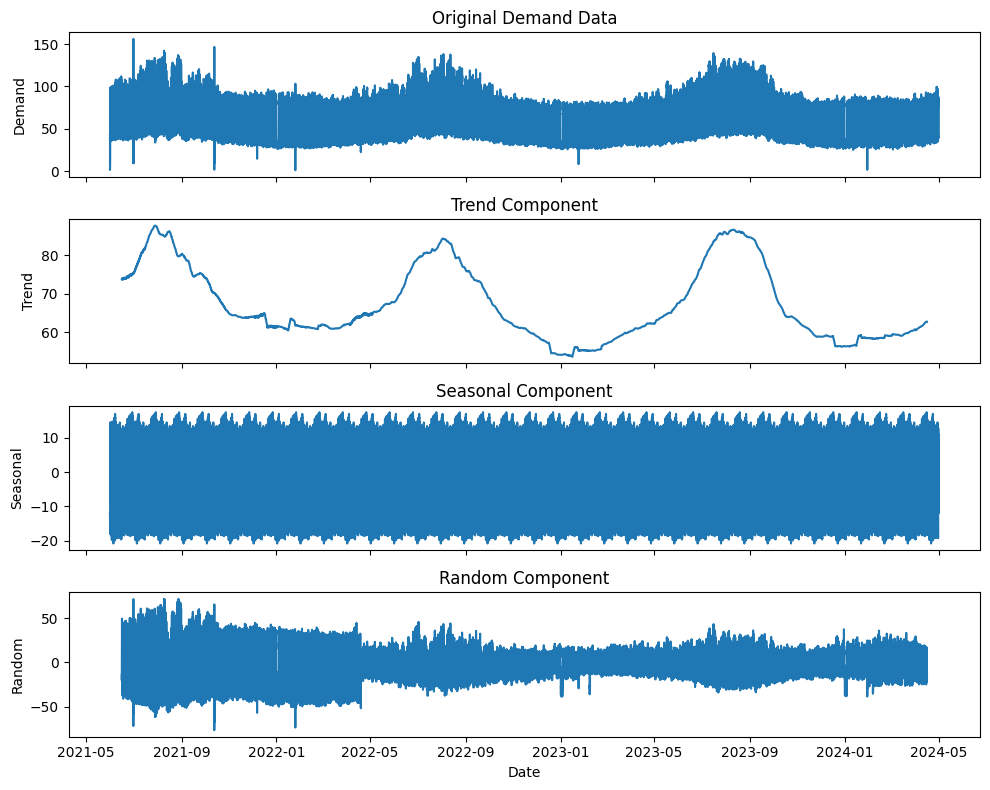

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
period = 48 * 30

decomposition = seasonal_decompose(df['demand'], model='additive', period=period)

fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axs[0].plot(decomposition.observed)
axs[0].set_title('Original Demand Data')
axs[0].set_ylabel('Demand')

axs[1].plot(decomposition.trend)
axs[1].set_title('Trend Component')
axs[1].set_ylabel('Trend')

axs[2].plot(decomposition.seasonal)
axs[2].set_title('Seasonal Component')
axs[2].set_ylabel('Seasonal')

axs[3].plot(decomposition.resid)
axs[3].set_title('Random Component')
axs[3].set_ylabel('Random')
axs[3].set_xlabel('Date')

plt.tight_layout()
plt.show()

**SEATS method**

In [8]:
df['demand'].asfreq('M')

C:\Users\MSI\AppData\Local\Temp\ipykernel_19124\1160338717.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['demand'].asfreq('M')


Date
2021-06-30    44.948
2021-07-31    45.016
2021-08-31    46.840
2021-09-30    40.955
2021-10-31    36.373
2021-11-30    34.372
2021-12-31    33.245
2022-01-31    37.622
2022-02-28    33.974
2022-03-31    36.492
2022-04-30    36.627
2022-05-31    38.056
2022-06-30    48.508
2022-07-31    52.165
2022-08-31    41.786
2022-09-30    40.194
2022-10-31    37.884
2022-11-30    37.537
2022-12-31    32.822
2023-01-31    32.902
2023-02-28    34.810
2023-03-31    36.524
2023-04-30    38.208
2023-05-31    41.269
2023-06-30    43.429
2023-07-31    46.597
2023-08-31    44.670
2023-09-30    43.802
2023-10-31    40.709
2023-11-30    34.807
2023-12-31    36.535
2024-01-31    34.279
2024-02-29    38.159
2024-03-31    38.424
2024-04-30    41.054
Freq: ME, Name: demand, dtype: float64

In [12]:
from statsmodels.tsa.x13 import x13_arima_analysis, X13NotFoundError
try:
    # Perform SEATS decomposition
    result = x13_arima_analysis(df['demand'].asfreq('M'), x12path='x13as')  # Set x12path to the path of your X-13ARIMA-SEATS installation if necessary

    # Plotting the results
    decomposed = result.results
    fig = decomposed.plot()
    plt.show()

except X13NotFoundError as e:
    print("X-13ARIMA-SEATS is not installed or the path is not configured correctly.")
    print(e)

except Exception as e:
    print("An error occurred during SEATS decomposition:")
    print(e)

C:\Users\MSI\AppData\Local\Temp\ipykernel_19124\481280238.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  result = x13_arima_analysis(df['demand'].asfreq('M'), x12path='x13as')  # Set x12path to the path of your X-13ARIMA-SEATS installation if necessary


An error occurred during SEATS decomposition:
ERROR: Series to be modelled and/or seasonally adjusted must have at
        least 3 complete years of data.
  
  No seasonal adjustment this run


**3.6 STL decomposition**  
STL is a versatile and robust method for decomposing time series. STL is an acronym for “Seasonal and Trend decomposition using Loess”, while loess is a method for estimating nonlinear relationships.  
STL has several advantages over classical decomposition, and the SEATS and X-11 methods:
- Unlike SEATS and X-11, STL will handle any type of seasonality, not only monthly and quarterly data.  
- The seasonal component is allowed to change over time, and the rate of change can be controlled by the user.
- The smoothness of the trend-cycle can also be controlled by the user.
- It can be robust to outliers (i.e., the user can specify a robust decomposition), so that occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.  

On the other hand, STL has some disadvantages. In particular, it does not handle trading day or calendar variation automatically, and it only provides facilities for additive decompositions.

The two main parameters to be chosen when using STL are the **trend-cycle window trend**(trend = ?) and the **seasonal window season**(seasonal = ?). These control how rapidly the trend-cycle and seasonal components can change. Smaller values allow for more rapid changes. Both trend and seasonal windows should be odd numbers; trend window is the number of consecutive observations to be used when estimating the trend-cycle; season window is the number of consecutive years to be used in estimating each value in the seasonal component. Setting the seasonal window to be infinite is equivalent to forcing the seasonal component to be periodic season(window='periodic') (i.e., identical across years)

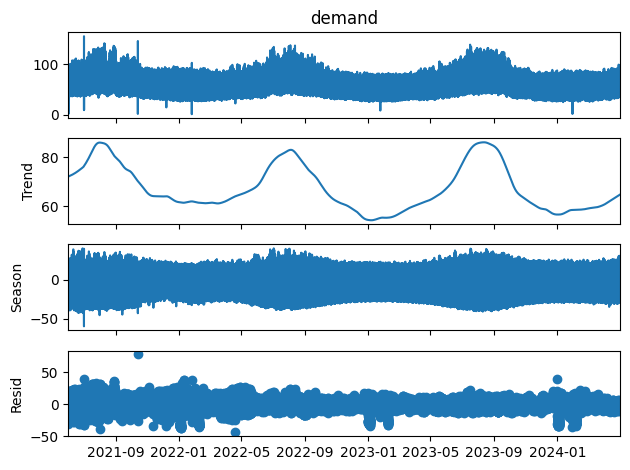

In [15]:
from statsmodels.tsa.seasonal import STL
# STL decomposition
stl = STL(df['demand'], period=48*30)  
result = stl.fit()

# Plotting the decomposition
result.plot()
plt.show()